<a href="https://colab.research.google.com/github/shipra-bhadauria/Deep-Learning_practice/blob/main/VanillaRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


-----------Problem Statement---------------------

Reuters Newswire Topic Classification Dataset. 

It consists of 11,228 newswires from Reuters classified into 46 main topics.
Features  is a list of sequences which represents the newswire text.

Labels is a list of integer labels from 1 to 90 which represents different categories.

In [ ]:
import numpy as np

from sklearn.metrics import accuracy_score
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# parameters for data load
## num_worsds: top most frequent words to consider;
## maxlen= maximum sequence lengths to be considered, truncate long sequences.
num_words = 30000
maxlen = 50
test_split = 0.3

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

2121728/2110848 [==============================] - 0s 0us/step
(1395,)
(1395,)
(599,)
(599,)


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
#pad_sequences transform a list into a 2D array
# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')
X_train[0]

array([   1,  245,  273,  207,  156,   53,   74,  160,   26,   14,   46,
        296,   26,   39,   74, 2979, 3554,   14,   46, 4689, 4329,   86,
         61, 3499, 4795,   14,   61,  451, 4329,   17,   12,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0], dtype=int32)

In [ ]:
X_train.shape

(1395, 49)

In [ ]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))
X_train.shape

(1395, 49, 1)

In [ ]:
y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)
y_train = y_data[:1395]
y_test = y_data[1395:]

In [ ]:
print(y_train.shape)
print(y_test.shape)

(1395, 46)
(599, 46)


In [ ]:
y_data[1,:]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(30, input_shape = (49,1), return_sequences = False, dropout=0.2))
    model.add(Dense(46)) #output layer 
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [ ]:
model = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size = 50, verbose = 1,validation_data=(X_test,y_test))
history=model.fit(X_train, y_train)

Epoch 1/200
28/28 [==============================] - 1s 41ms/step - loss: 3.6047 - accuracy: 0.3441 - val_loss: 3.1438 - val_accuracy: 0.6144
Epoch 2/200
28/28 [==============================] - 1s 39ms/step - loss: 2.5394 - accuracy: 0.6444 - val_loss: 1.8821 - val_accuracy: 0.7028
Epoch 3/200
28/28 [==============================] - 1s 37ms/step - loss: 1.6049 - accuracy: 0.6796 - val_loss: 1.3069 - val_accuracy: 0.7229
Epoch 4/200
28/28 [==============================] - 1s 33ms/step - loss: 1.3060 - accuracy: 0.6918 - val_loss: 1.1965 - val_accuracy: 0.7229
Epoch 5/200
28/28 [==============================] - 1s 33ms/step - loss: 1.2307 - accuracy: 0.7032 - val_loss: 1.1677 - val_accuracy: 0.7479
Epoch 6/200
28/28 [==============================] - 1s 35ms/step - loss: 1.2002 - accuracy: 0.7133 - val_loss: 1.1566 - val_accuracy: 0.7479
Epoch 7/200
28/28 [==============================] - 1s 34ms/step - loss: 1.1879 - accuracy: 0.7140 - val_loss: 1.1506 - val_accuracy: 0.7479
Epoch 

In [ ]:
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis = 1)

print(accuracy_score(y_pred, y_test_))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
12/12 [==============================] - 0s 4ms/step
0.7479131886477463


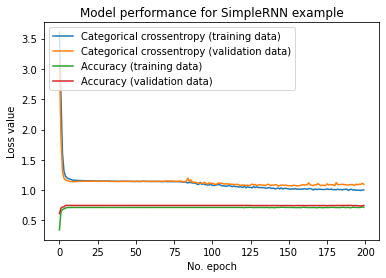

In [ ]:
# Plot history: Categorical crossentropy & Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Categorical crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance for SimpleRNN example')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()